In [1]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
stocks = drive.CreateFile({'id': '-------'})
stocks.GetContentFile('adjusted_stock_price.csv')

In [ ]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

# We'll just be using the stocks data of Apple Inc. out of all the given stocks data of 501 firms.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#import talib as ta
#from sklearn.utils import shuffle

In [2]:
stocks = pd.read_csv('prices-split-adjusted.csv')

In [3]:
stocks.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
# we'll be predicting apple stocks for the next day
apple_stock = stocks.loc[stocks['symbol'] == 'AAPL']

In [5]:
#setting the dataframe index to date column
apple_stock['date'] = pd.to_datetime(apple_stock['date'],format='%Y-%m-%d')

/home/gunjan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0
2010-01-11,AAPL,30.400000,30.015715,29.778572,30.428572,115557400.0
2010-01-12,AAPL,29.884285,29.674286,29.488571,29.967142,148614900.0
2010-01-13,AAPL,29.695715,30.092857,29.157143,30.132856,151473000.0
2010-01-14,AAPL,30.015715,29.918571,29.860001,30.065714,108223500.0


In [7]:
apple_stock = apple_stock.set_index('date')

# We'll be using only 'close' column for predictions so let's visualize it.

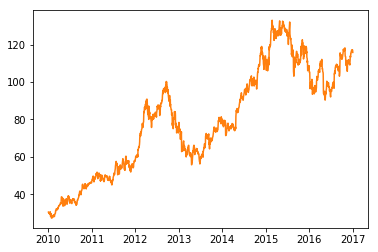

In [11]:
plt.plot(apple_stock['close'])
plt.show()

In [13]:
#filtering 'close' column from the dataset
dataset = apple_stock.filter(['close'])

In [14]:
#creating the train, test and validation set.
train = dataset[:1400]
validate = dataset[1400:1600]
test = dataset[1600:]

In [15]:
train = train.values
validate = validate.values
test = test.values

**Scaling the data in the range 0 to 1 (both inclusive) to feed into the LSTM model.**



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler(feature_range=[0,1])

In [17]:
train = scaled.fit_transform(train)
validate = scaled.fit_transform(validate)
test = scaled.fit_transform(test)

## Creating a data structure with 100 timesteps and 1 output

In [18]:
x_train = []
y_train = []

for i in range(100,len(train)):
  x_train.append(train[i-100:i,0])
  y_train.append(train[i,0])

In [19]:
x_val = []
y_val = []

for i in range(100,len(validate)):
  x_val.append(validate[i-100:i,0])
  y_val.append(validate[i,0])

In [20]:
x_test = []
y_test = []

for i in range(100,len(test)):
  x_test.append(test[i-100:i,0])
  y_test.append(test[i,0])

In [22]:
#converting lists into numpy array
x_train,y_train = np.array(x_train), np.array(y_train)
x_val, y_val = np.array(x_val), np.array(y_val)
x_test,y_test = np.array(x_test), np.array(y_test)

In [23]:
#reshaping the numpy arrays into 3d shape for feeding into lstm
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_val = np.reshape(x_val,(x_val.shape[0],x_val.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [24]:
x_train.shape,x_val.shape,x_test.shape

((1300, 100, 1), (100, 100, 1), (62, 100, 1))

## LSTM modelling

In [25]:
from keras import Sequential
from keras.layers import LSTM,Dense,Dropout

model = Sequential()

model.add(LSTM(units = 92, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

/home/gunjan/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/gunjan/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gunjan/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gunjan/anaconda3/lib/python3.5/site-packa

In [26]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
#model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10)

Train on 1300 samples, validate on 100 samples
Epoch 1/10
1300/1300 [==============================] - 31s 24ms/step - loss: 0.0268 - val_loss: 0.0625
Epoch 2/10
1300/1300 [==============================] - 21s 16ms/step - loss: 0.0028 - val_loss: 0.0528
Epoch 3/10
1300/1300 [==============================] - 19s 15ms/step - loss: 0.0028 - val_loss: 0.0518
Epoch 4/10
1300/1300 [==============================] - 21s 16ms/step - loss: 0.0028 - val_loss: 0.0503
Epoch 5/10
1300/1300 [==============================] - 21s 16ms/step - loss: 0.0029 - val_loss: 0.0543
Epoch 6/10
1300/1300 [==============================] - 20s 15ms/step - loss: 0.0028 - val_loss: 0.0440
Epoch 7/10
1300/1300 [==============================] - 20s 15ms/step - loss: 0.0023 - val_loss: 0.0481
Epoch 8/10
1300/1300 [==============================] - 20s 15ms/step - loss: 0.0026 - val_loss: 0.0498
Epoch 9/10
1300/1300 [==============================] - 20s 15ms/step - loss: 0.0027 - val_loss: 0.0376
Epoch 10/10
1300/

## Loading the pre-trained model

In [31]:
#model.save('stonks.h5')

import keras
model = keras.models.load_model('stonks.h5')

### Predicting the stocks closed prices from x_test and visualiazing and validating with y_test

In [56]:
predictions = model.predict(x_test)
#predictions = scaled.inverse_transform(predictions)

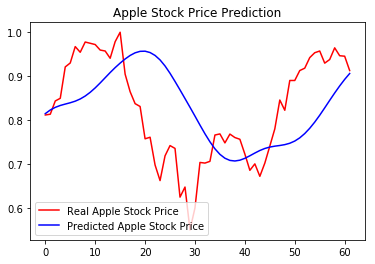

In [57]:
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()

## The predictions are not much accurate but the model has nicely captured the trends. 

### Predicting next day stock price(closed) using the last historical data of 100 stock prices(closed)

In [59]:
last_100 = x_test[61]
last_100 = np.reshape(last_100,(1,100,1))

In [63]:
next_day_predicted_closed_price = model.predict(last_100)

In [69]:
scaled.inverse_transform(next_day_predicted_closed_price)

array([[115.63217]], dtype=float32)

In [77]:
#last day closing price from data
scaled.inverse_transform([y_test[-1:]])

array([[115.82]])

### Therefore the estimated future closed price for the next day will be 115.63 approx.  which is slightly less than the previous day closing price.